In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly
import optuna

In [2]:
df = pd.read_csv("../data/raw/train.csv", index_col='id')

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.nunique()

In [ ]:
from eda import EDA

In [5]:
initial_eda = pd.read_csv("../data/processed/initial_eda.csv")
initial_eda.sort_values('mutual_information',ascending=False)

,index,missing_val%,Dtype,cardinality,mode_freq,entropy,skewness,mutual_information,value_counts
7,exam_score,0.0,float64,805,2.453651,NaN,-0.048273,6.4888,"{100.0: 15458, 19.599: 6336, 69.4: 1740, 61.3:..."
8,study_hours,0.0,float64,792,2.295238,NaN,0.008931,0.9118,"{0.08: 14460, 7.91: 12840, 4.69: 2451, 4.67: 2..."
9,class_attendance,0.0,float64,617,2.422857,NaN,-0.095832,0.3029,"{99.4: 15264, 40.6: 6985, 89.4: 2182, 97.3: 20..."
10,sleep_hours,0.0,float64,66,2.985238,NaN,-0.039986,0.0745,"{9.9: 18807, 4.1: 17928, 9.2: 12957, 6.2: 1260..."
1,study_method,0.0,object,5,20.904286,2.321019,NaN,0.0414,"{'coaching': 131697, 'self-study': 131131, 'mi..."
4,sleep_quality,0.0,object,3,33.916667,1.584585,NaN,0.0365,"{'poor': 213675, 'good': 213089, 'average': 20..."
3,facility_rating,0.0,object,3,33.981270,1.584612,NaN,0.0300,"{'medium': 214082, 'low': 212378, 'high': 203540}"
0,course,0.0,object,7,20.831111,2.739342,NaN,0.0193,"{'b.tech': 131236, 'b.sc': 111554, 'b.com': 11..."
11,age,0.0,int64,8,13.749206,2.997971,-0.023878,0.0124,"{21: 86620, 23: 82872, 20: 80742, 19: 78885, 2..."
2,exam_difficulty,0.0,object,3,56.187619,1.402083,NaN,0.0089,"{'moderate': 353982, 'easy': 176540, 'hard': 9..."


In [12]:
df.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
id,,,,,,,,,,,,
0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [28]:
df.describe()

,age,study_hours,class_attendance,sleep_hours,exam_score
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,20.545821,4.002337,71.987261,7.072758,62.506672
std,2.260238,2.359880,17.430098,1.744811,18.916884
min,17.000000,0.080000,40.600000,4.100000,19.599000
25%,19.000000,1.970000,57.000000,5.600000,48.800000
50%,21.000000,4.000000,72.600000,7.100000,62.600000
75%,23.000000,6.050000,87.200000,8.600000,76.300000
max,24.000000,7.910000,99.400000,9.900000,100.000000


In [26]:
df.loc[(df.study_hours > 7)].exam_score.mean()

np.float64(83.66301473059582)

<Axes: xlabel='sleep_quality', ylabel='exam_score'>

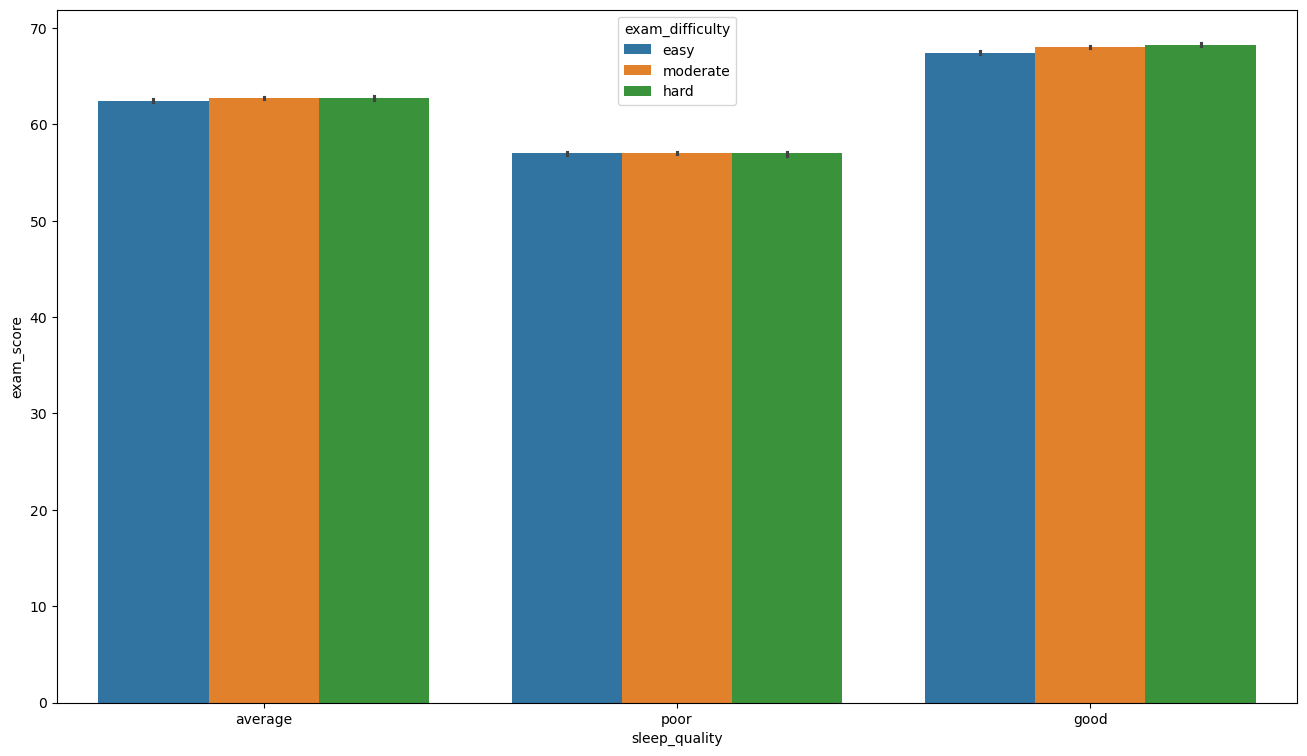

In [19]:
plt.figure(figsize=(16,9))
sns.barplot(df, x='sleep_quality', y='exam_score', hue='exam_difficulty')

In [ ]:
# initial_eda.to_csv("../data/processed/initial_eda.csv")

In [ ]:
df.duplicated().sum()

In [ ]:
sns_kde = sns.kdeplot(df.exam_score, bw_adjust=1)

In [ ]:
line = sns_kde.lines[0]
x_vals = line.get_xdata()
y_vals = line.get_ydata()

print((x_vals, y_vals))

In [ ]:
df.exam_score.plot.kde()

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
sns.kdeplot(np.exp(df['exam_score']), fill=True)

In [ ]:
sns.kdeplot(np.log(df['exam_score']), fill=True)

In [ ]:
sns.kdeplot(df['study_hours'], fill=True)

In [ ]:
sns.kdeplot(df['exam_score'], fill=True)

In [ ]:
yy = df.exam_score.copy()
y_min = yy.min()
y_max = yy.max()
eps = 1e-3

y_scaled = (yy - y_min + eps) / (y_max - y_min + 2*eps)
y_logit = np.log(y_scaled / (1 - y_scaled))


In [ ]:
sns.kdeplot(y_scaled, fill=True)

In [ ]:
import numpy as np
from sklearn.compose import TransformedTargetRegressor


eps = 1e-3

def logit_transform(y):
    y_min = y.min()
    y_max = y.max()
    y_scaled = (y - y_min + eps) / (y_max - y_min + 2*eps)
    return np.log(y_scaled / (1 - y_scaled))

def inverse_logit_transform(y_logit, y_min, y_max):
    y_scaled = 1 / (1 + np.exp(-y_logit))
    return y_scaled * (y_max - y_min + 2*eps) + y_min - eps



class LogitTargetRegressor(TransformedTargetRegressor):
    def fit(self, X, y):
        self.y_min_ = y.min()
        self.y_max_ = y.max()
        return super().fit(X, y)

    def _transform(self, y):
        y_scaled = (y - self.y_min_ + eps) / (self.y_max_ - self.y_min_ + 2*eps)
        return np.log(y_scaled / (1 - y_scaled))

    def _inverse_transform(self, y):
        y_scaled = 1 / (1 + np.exp(-y))
        return y_scaled * (self.y_max_ - self.y_min_ + 2*eps) + self.y_min_ - eps





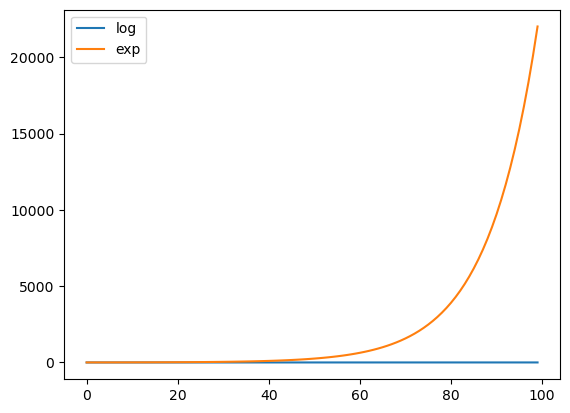

In [47]:
vals = np.linspace(1,10,100)
plt.plot(np.log(vals), label='log')
plt.plot(np.exp(vals), label='exp')
plt.legend()
plt.show()


<Axes: ylabel='Frequency'>

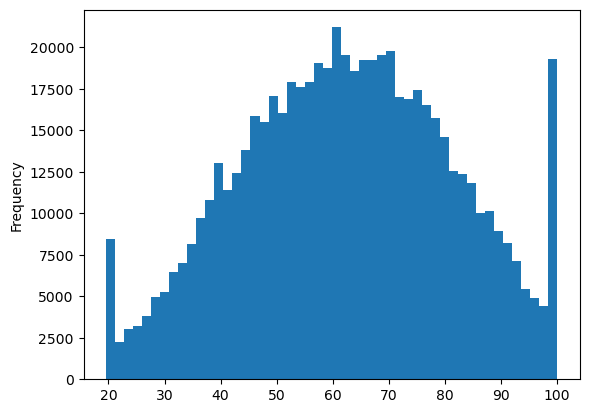

In [59]:
df.exam_score.plot.hist(bins=50)

In [53]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='exam_score').copy()
y = df.exam_score.copy()

y_binned = pd.qcut(y, q=10, duplicates="drop")

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y_binned)

In [60]:

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer

from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import root_mean_squared_error


def add_engineered_features(X: pd.DataFrame) -> pd.DataFrame:
    X = X.copy()

    X['study_efficiency'] = X['study_hours'] / (X['sleep_hours'] + 1e-3)
    # X['attendance_x_study'] = X['study_hours'] * X['class_attendance']

    return X

feature_engineering = FunctionTransformer(
    add_engineered_features,
    validate=False  # IMPORTANT for DataFrames
)


ordinal_cat_cols = ['exam_difficulty', 'facility_rating', 'sleep_quality']
ordinal_cat_categories = [
    ['easy', 'moderate', 'hard', '__missing__'],
    ['low', 'medium', 'high', '__missing__'],
    ['poor','average', 'good', '__missing__']
]
nominal_cat_cols = ['course', 'study_method', 'gender', 'internet_access']
numerical_cols = ['study_hours', 'class_attendance', 'sleep_hours']#, 'age']
# numerical_cols = ['study_hours', 'age', 'attendance_x_study']

cat_ordinal_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='__missing__')),
        ('cat_ordinal', OrdinalEncoder(categories=ordinal_cat_categories, handle_unknown='use_encoded_value', unknown_value=-1))
    ]
)
cat_nominal_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='__missing__')),
        # ('cat_nominal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]
)
numerical_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median'))
        ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat_ordinal', cat_ordinal_pipeline , ordinal_cat_cols),
        ('cat_nominal', cat_nominal_pipeline, nominal_cat_cols),
        ('numeric', numerical_pipeline, numerical_cols)
        ],
        verbose_feature_names_out=True,
        remainder='drop'
)

training_pipeline = Pipeline(
    steps=[
        # ('feature_engineering', feature_engineering),
        ('preprocessor', preprocessor),
        ('model', XGBRegressor( device='gpu', 
                               n_estimators=1000, 
                               learning_rate=0.05, 
                               n_jobs=-1, 
                               random_state=42,
                               ))
    ]
)



# model = LogitTargetRegressor(
#     regressor=training_pipeline
# )


cv_scores = -cross_val_score(
    training_pipeline,
    X_train,
    y_train,
    scoring='neg_root_mean_squared_error',
    cv=5
)

print(f"Training set CV RMSE {cv_scores.mean():.5f}")

# training_pipeline.fit(X_train, y_train)
# y_pred = training_pipeline.predict(X_valid)

training_pipeline.fit(X_train, y_train)
train_rmse = root_mean_squared_error(y_train, training_pipeline.predict(X_train))
print(f'Training set RMSE {train_rmse:.5f}')

y_pred = training_pipeline.predict(X_valid)
valid_rmse = root_mean_squared_error(y_valid, y_pred)
print(f'Validation set RMSE {valid_rmse:.5f}')

y_pred_clipped = y_pred.clip(df.exam_score.min(), df.exam_score.max())
cliped_rmse = root_mean_squared_error(y_valid, y_pred_clipped)
print(f'cliped RMSE {cliped_rmse:.5f}')



Training set CV RMSE 8.76761
Training set RMSE 8.53564
Validation set RMSE 8.74698
cliped RMSE 8.74668


In [69]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier


def histogram_xgb_fit_eval(
    X_train,
    y_train,
    X_valid,
    y_valid,
    preprocessor,
    n_bins=20,
    xgb_params=None,
):

    # ----- 1. Build bins from TRAIN ONLY -----
    bin_edges = np.quantile(y_train, np.linspace(0, 1, n_bins + 1))
    bin_edges[0] -= 1e-6
    bin_edges[-1] += 1e-6
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    # Bin targets
    y_train_binned = np.digitize(y_train, bin_edges) - 1

    # ----- 2. Default XGBoost params -----
    if xgb_params is None:
        xgb_params = dict(
            objective="multi:softprob",
            num_class=n_bins,
            n_estimators=1000,
            # max_depth=5,
            learning_rate=0.05,
            # subsample=0.8,
            # colsample_bytree=0.8,
            # tree_method="hist",
            device="cuda",
            n_jobs=-1,
            random_state=42,
            verbosity=0,
        )

    model = XGBClassifier(**xgb_params)

    # ----- 3. Pipeline -----
    pipeline = Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("model", model),
        ]
    )

    # ----- 4. Fit -----
    pipeline.fit(X_train, y_train_binned)

    # ----- 5. Predict distributions -----
    probs_train = pipeline.predict_proba(X_train)
    probs_valid = pipeline.predict_proba(X_valid)

    # Expected value predictions
    y_train_pred = probs_train @ bin_centers
    y_valid_pred = probs_valid @ bin_centers

    # ----- 6. RMSE -----
    
    rmse_train = root_mean_squared_error(y_train, y_train_pred)
    rmse_valid = root_mean_squared_error(y_valid, y_valid_pred)

    print(f"Train RMSE:  {rmse_train:.4f}")
    print(f"Valid RMSE:  {rmse_valid:.4f}")

    return {
        "rmse_train": rmse_train,
        "rmse_valid": rmse_valid,
        "bin_edges": bin_edges,
        "bin_centers": bin_centers,
        "pipeline": pipeline,
    }

results = histogram_xgb_fit_eval(
    X_train=X_train,
    y_train=y_train,
    X_valid=X_valid,
    y_valid=y_valid,
    preprocessor=preprocessor,
    n_bins=80,
)



KeyboardInterrupt: 

In [ ]:
# Training set CV RMSE 8.76293
# Validation set RMSE 8.52378
# Validation set RMSE 8.76371
# cliped RMSE 8.76324

# Training set CV RMSE 8.76376
# Training set RMSE 8.52599
# Validation set RMSE 8.74791
# cliped RMSE 8.74736

# Train RMSE:  8.4709
# Valid RMSE:  8.7314


-   Training set CV RMSE  8.85593802774962
-   Validation set RMSE 8.83719402414072
-   Training set CV RMSE  8.847549361576696
-   Validation set RMSE 8.828535786090907

-   Training set CV RMSE 8.76376
-   Validation set RMSE 8.74791
-   cliped RMSE 8.74736

    Training set CV RMSE 8.82397
    Validation set RMSE 8.80686
    cliped RMSE 8.80612

In [5]:
X_train = preprocessor.fit_transform(X_train)
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.84,79.0,9.9,20.0
1,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,3.35,94.2,6.0,19.0
2,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,2.20,87.5,6.8,18.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,3.10,64.0,7.6,18.0
4,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.44,56.2,5.5,22.0


In [6]:


def objective(trial):
    params = {
        'n_estimators' :  trial.suggest_int('n_estimators', 750, 800),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.06, 0.065, log=True),
        'subsample':  trial.suggest_float('subsample', 0.6, 1.0),
        # 'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        # 'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 5.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 5.0, log=True),
        'random_state':  42,
        'n_jobs': 1,
        'verbosity': 0,
        'tree_method': 'hist'
    }
    model = XGBRegressor(**params, device='cuda')
    # pipeline = Pipeline(
    #     steps=[
    #         ('preprocessor', preprocessor),
    #         ('model', model)
    #     ]
    # )

    score = cross_val_score(model, X=X_train, y=y_train, cv=5, scoring='neg_root_mean_squared_error', n_jobs=1).mean()
    return -score

study = optuna.create_study(study_name='xgb test', direction='minimize')
study.optimize(objective, n_trials=30, show_progress_bar=True, n_jobs=1)
best_params = study.best_params
print(f"\n   Best XGBoost RMSE: {study.best_value:.4f}")
print(f"   Best parameters: {study.best_params}")

[I 2026-01-19 11:41:14,721] A new study created in memory with name: xgb test


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2026-01-19 11:44:20,930] Trial 0 finished with value: 9.094060862962525 and parameters: {'n_estimators': 757, 'max_depth': 12, 'learning_rate': 0.06343408604904349, 'subsample': 0.8427240105512815, 'reg_alpha': 0.002006138163537105, 'reg_lambda': 2.4933353068980544e-07}. Best is trial 0 with value: 9.094060862962525.
[I 2026-01-19 11:45:33,664] Trial 1 finished with value: 8.903892891051447 and parameters: {'n_estimators': 777, 'max_depth': 10, 'learning_rate': 0.06037452984569889, 'subsample': 0.8779905740073598, 'reg_alpha': 0.0326817109781718, 'reg_lambda': 4.679159351580483e-08}. Best is trial 1 with value: 8.903892891051447.
[I 2026-01-19 11:45:58,724] Trial 2 finished with value: 8.771404346148442 and parameters: {'n_estimators': 769, 'max_depth': 7, 'learning_rate': 0.06313609193064071, 'subsample': 0.9279012204728831, 'reg_alpha': 4.20456367050429, 'reg_lambda': 8.488013955129039e-05}. Best is trial 2 with value: 8.771404346148442.
[W 2026-01-19 11:46:06,687] Trial 3 failed 

KeyboardInterrupt: 

In [ ]:
import optuna.visualization as vis 

display(vis.plot_param_importances(study))
display(vis.plot_optimization_history(study))
display(vis.plot_slice(study))
display(vis.plot_contour(study))


In [ ]:
errors = y_pred - y_valid
plt.hist(errors, bins=50)
plt.xlabel("Prediction error")
plt.show()


In [ ]:
errors = y_pred - y_valid
print(np.percentile(np.abs(errors), [90, 95, 99]))

In [ ]:
plt.scatter(y_valid, errors, s=5)
plt.axhline(0)
plt.xlabel("True value")
plt.ylabel("Error")
plt.show()


In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(16,9), dpi=150)
sns.scatterplot(x=df.exam_score,y=df.study_hours,s=20, hue=X_valid.exam_difficulty, alpha=0.7)
plt.show()

In [ ]:
y_pred_clipped.max()

In [ ]:
valid_rmse

In [ ]:
df.loc[df.exam_score == 100]

In [ ]:
df.select_dtypes(['number']).corr()

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(df.select_dtypes(['number']).corr(), annot=True, cmap='coolwarm')

In [ ]:
sns.pairplot(df.select_dtypes(['number']))

In [ ]:
df.query("study_method == 'mixed' and sleep_quality == 'good'").shape


In [ ]:
plt.figure(figsize=(16,9))
sns.boxplot(x='study_method', y='exam_score', data=df ,hue='sleep_quality')

In [ ]:
df.shape

In [ ]:
def count_outliers(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((group < lower) | (group > upper)).sum()

outlier_counts = (
    df
    .groupby(['study_method', 'sleep_quality'])['exam_score']
    .apply(count_outliers)
    .reset_index(name='outlier_count')
)

outlier_counts


In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(data=df, x='exam_score', hue='internet_access')

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(data=df, x='exam_score', hue='exam_difficulty')

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(data=df, x='exam_score', hue='facility_rating')

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(data=df, x='exam_score', hue='sleep_quality')

In [ ]:
df.loc[df.study_method == 'self-study', 'exam_score'].plot.kde()

In [ ]:
df.loc[df.study_method == 'online videos', 'exam_score'].plot.kde()

In [ ]:
df.loc[df.study_method == 'group study', 'exam_score'].plot.kde()

In [ ]:
df.loc[df.study_method == 'mixed', 'exam_score'].plot.kde()

In [ ]:
df.loc[df.study_method == 'coaching', 'exam_score'].plot.kde()

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(data=df, x='exam_score', hue='study_method')

In [ ]:
print(f'prediction: max,min {y_pred.max(), y_pred.min()}')
print(f'true y: max,min {df.exam_score.max(), df.exam_score.min()}')

In [ ]:
sns.histplot(y_pred)

In [ ]:
initial_eda[~initial_eda['index'].isin(ordinal_cat_cols) ]

In [ ]:
df.course.value_counts().plot.barh()

In [ ]:
df.study_method.value_counts().plot.barh()

In [ ]:
df.gender.value_counts().plot.barh()

In [ ]:
df.internet_access.value_counts().plot.barh()

In [ ]:
initial_eda[~initial_eda['index'].isin(ordinal_cat_cols + nominal_cat_cols) ]['index'].to_list()

In [ ]:
df[['study_hours', 'class_attendance', 'sleep_hours', 'exam_score']].agg(['min', 'max', 'skew'])

In [ ]:
df['study_hours'].plot.kde()

In [ ]:
df['age'].plot.kde()

In [ ]:
sns.violinplot(df[['study_hours', 'class_attendance', 'sleep_hours', 'exam_score']])

In [ ]:
sns.boxenplot(df[['study_hours', 'class_attendance', 'sleep_hours', 'exam_score']])